## Convocatoria 1 - Proyecto 1


In [2]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import of libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import morphology

#### 0) Cargar una de las imágenes histológicas


Rango de valores: [0.0, 1.0]


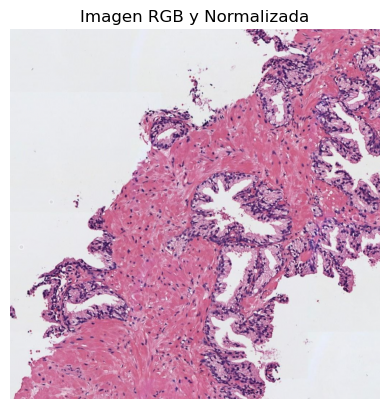

In [4]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB.
# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
# Visualizar la imagen

# Load initial image --> the default
img = cv2.imread("./histo_1.jpg", cv2.COLOR_BGR2RGB)

# Convert to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalize image
img_normalize = img_RGB / 255
print("Rango de valores:", [np.min(img_normalize), np.max(img_normalize)])

# Visualize image
plt.imshow(img_normalize)
plt.axis("off")
plt.title("Imagen RGB y Normalizada")
plt.show()

#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK


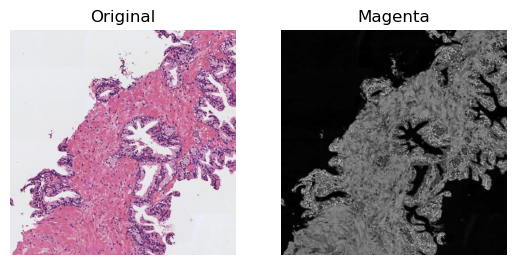

In [5]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Visualizar la imagen del canal magenta

# Split RGB channels
R, G, B = cv2.split(img_normalize)

# Calculate CMYK channels
with np.errstate(invalid="ignore", divide="ignore"):
    K = 1 - np.max(img_normalize, axis=2)
    C = (1 - R - K) / (1 - K)
    M = (1 - G - K) / (1 - K)
    Y = (1 - B - K) / (1 - K)

# Join and split CMYK channels
CMYK = np.dstack((C, M, Y, K)) * 255
channels = cv2.split(CMYK)

# Plots resulting images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img_normalize)
ax[0].set_title("Original")
ax[0].axison = False

ax[1].imshow(channels[1], cmap="gray")
ax[1].set_title("Magenta")
ax[1].axison = False


plt.show()

#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular


Otsu threshold: 180.0


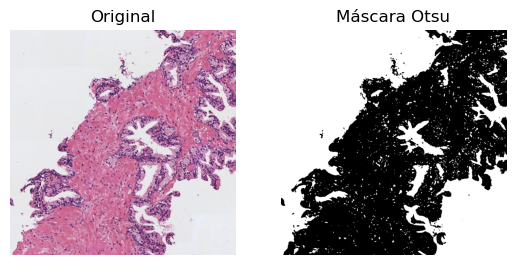

In [36]:
# Aplicar un filtro gaussiano de tamaño 5x5 y después utilizar el método de Otsu de manera que
# los píxeles correspondientes al lumen y al background de la imagen sean 1s y el resto de los píxeles tengan un valor de 0.
# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
# Visualizar la máscara resultante

# we have to convert to gray scale to use Otsu
image_gray = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)

# apply gaussian blur
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)

# apply Otsu --> https://learnopencv.com/otsu-thresholding-with-opencv/
otsu_threshold, otsu_mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
print("Otsu threshold:", otsu_threshold)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img_RGB)
ax[0].set_title("Original")
ax[0].axison = False

ax[1].imshow(otsu_mask, cmap="gray")
ax[1].set_title("Máscara Otsu")
ax[1].axison = False

plt.show()

#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)


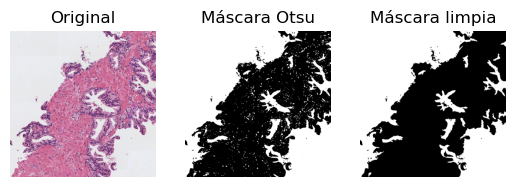

In [40]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante

# use skimage to remove small objects
cleaned_mask = morphology.remove_small_objects(otsu_mask > 0, min_size=300)

# Mostrar la imagen original y la máscara binaria resultante
fig, ax = plt.subplots(1, 3)

ax[0].imshow(img_RGB)
ax[0].set_title("Original")
ax[0].axison = False

ax[1].imshow(otsu_mask, cmap="gray")
ax[1].set_title("Máscara Otsu")
ax[1].axison = False

ax[2].imshow(cleaned_mask, cmap="gray")
ax[2].set_title("Máscara limpia")
ax[2].axis("off")

plt.show()

#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes


In [8]:
# Aplicar el algoritmo de expansión a partir de semillas (region growing) de manera que únicamente los lúmenes sean blancos
# y el resto de la imagen negra. Pista: utilizar dos semillas. Nota: Se pueden fijar las semillas de manera manual, pero
# se valorará positivamente a aquell@s que desarrollen una función para encontrarlas automáticamente.
# Visualizar la máscara resultante.

#### 5) Rellenar los objetos de los lúmenes


In [9]:
# Rellenar los lúmenes con la función binary_fill_holes de la librería scipy.ndimage.morphology
# Visualizar la máscara resultante

#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original


In [10]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles.
# Visualizar la imagen superpuesta

#### 7) Identificar y cropear el lumen más grande


In [11]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.

#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado


In [12]:
# Calcular las siguientes características del crop del lumen de mayor área, redondeando su valor hasta el cuarto decimal.
# 1) Área
# 2) Área de la bounding box
# 3) Área convexa
# 4) Exentricidad
# 5) Diámetro equivalente
# 6) Extensión
# 7) Diámetro Feret
# 8) Longitud del eje mayor
# 9) Longitud del eje menor
# 10) Orientación
# 11) Perímetro
# 12) Solidez
# 13) Compacidad